# CMU movie data set initial data exploration
In this notebook we seek to find general trends in the available data without performing in depth analysis. We seek to find high level trends which we can further explore

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json

## Import the data

In [41]:
character_df = pd.read_csv("dataset/MovieSummaries/character.metadata.tsv", sep="\t", header=None)
movies_df = pd.read_csv("dataset/MovieSummaries/movie.metadata.tsv", sep="\t", header=None)

### Relabel the columns

In [42]:
# relabel the columns 
character_df.columns = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor date of birth",
    "Actor gender",
    "Actor height (in meters)",
    "Actor ethnicity (Freebase ID)",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID"
]

# relabel the movie columns 
movies_df.columns = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie name",
    "Movie release date",
    "Movie box office revenue",
    "Movie runtime",
    "Movie languages (Freebase ID:name tuples)",
    "Movie countries (Freebase ID:name tuples)",
    "Movie genres (Freebase ID:name tuples)"
]

## Helper function to convert the json columns
Converts to json columns (language, country, genre) into a more workable format

In [43]:
# Helper function to clean up the columns which are stored as a json.
def convert_json_cols_(df, id_cols, convert_col, new_col_name):
    _df = df.loc[:, id_cols + [convert_col]]

    # create a new data frame based on just the movie genres
    _df["_dict"] = _df.apply(
        lambda row : json.loads(row[convert_col]), axis = 1)

    # get the values as a list
    _df[new_col_name] = _df.apply(
        lambda row : list(row["_dict"].values()), axis = 1)

    # make a long data frame where each genre of a film is replicated as a row. 
    # If a film has two genres, it will have two rows. 
    columns_to_drop = [convert_col, "_dict"]
    _df_long = _df.drop(columns=columns_to_drop).explode(column=new_col_name)
    return _df_long.reset_index(drop=True)

## Clean up the json columns
Make the columns easier to use

In [44]:
# more workable genre df
genre_df = convert_json_cols_(
    movies_df, 
    id_cols=["Wikipedia movie ID", "Freebase movie ID"],
    convert_col="Movie genres (Freebase ID:name tuples)",
    new_col_name="Genre"
    )

# more workable language df
language_df = convert_json_cols_(
    movies_df, 
    id_cols=["Wikipedia movie ID", "Freebase movie ID"],
    convert_col="Movie languages (Freebase ID:name tuples)",
    new_col_name="Language"
    )

# more workable language df
country_df = convert_json_cols_(
    movies_df, 
    id_cols=["Wikipedia movie ID", "Freebase movie ID"],
    convert_col="Movie countries (Freebase ID:name tuples)",
    new_col_name="Country"
    )

### Clean up the revenue column

In [45]:
# remove all the na revenue rows
revenue_df = movies_df.loc[:, ["Wikipedia movie ID", "Freebase movie ID", "Movie box office revenue"]].dropna(subset=["Movie box office revenue"])

In [46]:
na_revenue_bool_ = movies_df.loc[:, "Movie box office revenue"].isna()
na_revenue_df = movies_df.loc[na_revenue_bool_, :]

In [124]:
movies_df["Release_year"] = movies_df.loc[:, "Movie release date"].str.slice(0, 4)
year_df = movies_df.loc[:, ["Wikipedia movie ID", "Freebase movie ID", "Release_year"]]

## Inspect the movie release year

In [145]:
movies_df.loc[year_df.loc[:, "Release_year"]=="1010", :]

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Release_year
62836,29666067,/m/0fphzrf,Hunting Season,1010-12-02,12160978.0,140.0,"{""/m/02hwyss"": ""Turkish Language"", ""/m/02h40lc...","{""/m/01znc_"": ""Turkey""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...",1010


In [146]:
movies_df.loc[year_df.loc[:, "Release_year"]=="1888", :]

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Release_year
57963,1082508,/m/044ggd,Roundhay Garden Scene,1888,NaN,0.03,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1888


In [148]:
movies_df.loc[:, "Release_year"].unique()

array(['2001', '2000', '1988', '1987', '1983', '1913', '2002', '1938',
       '1974', '1960', '1930', '1997', '1989', '1986', nan, '1984',
       '1964', '1967', '1992', '1999', '2009', '1962', '1931', '1935',
       '1959', '2007', '1979', '1958', '1943', '1940', '2010', '1955',
       '1990', '2011', '1982', '2006', '1914', '1980', '2008', '1917',
       '1918', '1977', '1996', '1961', '1911', '1993', '1939', '1945',
       '1994', '2003', '1976', '1949', '1975', '1991', '1995', '1923',
       '1954', '1957', '1921', '1951', '1968', '1920', '1969', '2005',
       '1915', '1973', '1972', '1956', '1947', '1963', '2004', '1929',
       '2012', '1985', '1978', '1936', '1934', '1916', '1998', '1926',
       '1953', '1950', '1971', '1966', '1910', '1928', '1927', '1932',
       '1970', '1948', '1933', '1952', '1981', '1942', '1944', '1965',
       '1922', '1901', '2013', '1924', '1919', '1941', '1937', '1903',
       '1900', '1925', '1946', '1912', '1896', '1908', '1902', '1909',
       '1

### Plots to plot
- Avg. num of female actors in film as a time series
    - subdivide by genre
    - subdivide by country
    - subdivide by language
- boxplots of genre and avg. num of female actors
- instead of avg. num female actors, could look at proportion of actors who are female to scale for the number of characters in a film. 
- Avg. num of female actors above age 40 as a temporal analysis
- Compare the boxplots of the age of male actors and female actors. See if the young and beautiful standards are perpetuated in female actresses. 
- repeat all the above with female actors above age 40. 


## Create some of the plots

In [48]:
from scipy.stats import ttest_ind
import seaborn as sns

<Axes: xlabel='Actor gender', ylabel='Actor age at movie release'>

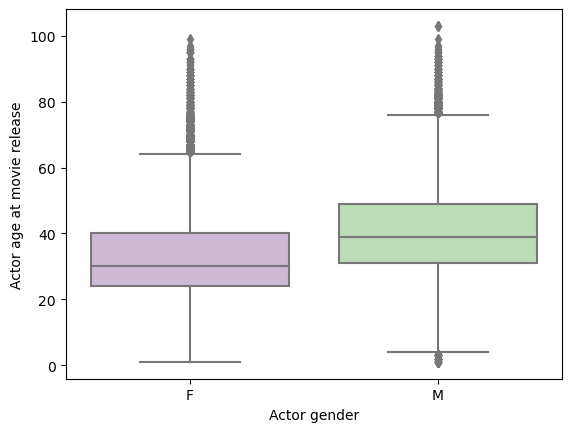

In [49]:
character_df_ = character_df.dropna(subset=["Actor gender", "Actor age at movie release"])
character_df_ = character_df_.loc[character_df_.loc[:, "Actor age at movie release"]>0, :]

sns.boxplot(x="Actor gender", y="Actor age at movie release", data=character_df_, palette="PRGn")

In [52]:
female_characters = character_df_.loc[:, "Actor gender"] == "F"
male_characters = character_df_.loc[:, "Actor gender"] == "M"

print("Number of female characters with valid age:", np.sum(female_characters))
print("Number of male characters with valid age:", np.sum(male_characters))

Number of female characters with valid age: 99100
Number of male characters with valid age: 191249


**Note** Here we do not perform a statistical test since the number of samples is too large. Any p-value calculated with this number of samples will end up being close to 0. Which is the case here.

## Temporal analysis of the average number of female casts vs male casts

In [53]:
from scipy.stats import norm

In [54]:
character_df_filter_year = character_df.dropna(subset=["Release_year"])

In [68]:
# for every movie, count the number of female and male actors 
gender_count_per_movie = character_df_filter_year.groupby(
    by=["Wikipedia movie ID"]).value_counts(subset=["Actor gender"]).reset_index()

In [114]:
pivoted_table = gender_count_per_movie.pivot_table(
    index = ["Wikipedia movie ID"], 
    columns="Actor gender", 
    values="count",
    fill_value=0).reset_index()
pivoted_table.rename_axis(None, axis=1)

,Wikipedia movie ID,F,M
0,330,4,0
1,3217,3,10
2,3333,6,8
3,3746,3,11
4,3837,2,18
...,...,...,...
59963,37322106,2,1
59964,37373877,3,3
59965,37476824,4,6
59966,37478048,1,3


In [117]:
pivoted_table.loc[:, "total"] = pivoted_table.loc[:, "F"] + pivoted_table.loc[:, "M"] 
pivoted_table.loc[:, "M_percentage"] = 100 * pivoted_table.loc[:, "M"] / pivoted_table.loc[:, "total"]
pivoted_table.loc[:, "F_percentage"] = 100 * pivoted_table.loc[:, "F"] / pivoted_table.loc[:, "total"]

In [127]:
pivoted_table = pd.merge(pivoted_table, year_df,left_on="Wikipedia movie ID", right_on="Wikipedia movie ID")

In [129]:
melted_table = pd.melt(
    pivoted_table, 
    id_vars=["Wikipedia movie ID", "Release_year"], 
    value_vars=["M_percentage", "F_percentage"],
    value_name="percentage")

In [167]:
from scipy.stats import norm

confidence_level=0.95
z_score_position = (1 + confidence_level)/2
# Find the Z-score for a 95% confidence interval
Z = norm.ppf(z_score_position)

stats_ = melted_table.groupby(by=["Release_year", 'variable'])["percentage"].aggregate([np.mean, np.std, len]).reset_index()

In [168]:
# some years don't have enough movies. We set an abitrary cut-off of 10 movies for further testing
movies_df.loc[:, "Release_year"].value_counts().reset_index().tail(10)
stats_ = stats_.loc[stats_.loc[:, "len"] >= 10, :]

,Release_year,count
120,2015,4
121,1891,3
122,1892,3
123,2016,3
124,1890,2
125,1904,1
126,1893,1
127,1889,1
128,1888,1
129,1010,1


## Plot the temporal change of percentage of male and female actors

Text(0.5, 1.0, 'Average percentage of Male and Female in films')

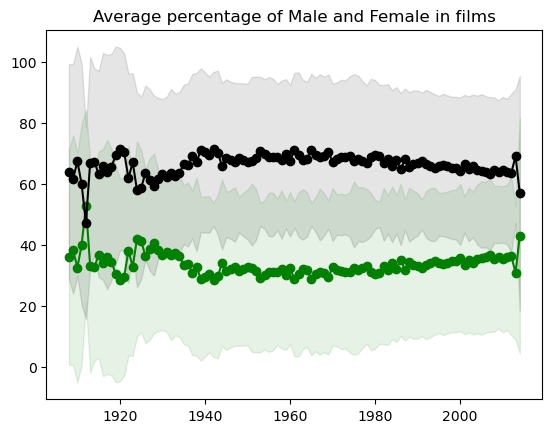

In [195]:
stats_.loc[:, "Release_year"] = pd.to_numeric(stats_.loc[:, "Release_year"])

stats_f = stats_.loc[stats_.loc[:, "variable"]=="F_percentage", :]
stats_m = stats_.loc[stats_.loc[:, "variable"]=="M_percentage", :]

# Plotting for Left-Handed Pitchers
plt.plot(stats_f.loc[:, "Release_year"], stats_f.loc[:, "mean"],
        marker='o', linestyle='-', color='green', label='Left-Handed')
plt.fill_between(
    stats_f.loc[:, "Release_year"].astype(float), 
    stats_f.loc[:, "mean"] - stats_f.loc[:, "std"],
    stats_f.loc[:, "mean"] + stats_f.loc[:, "std"], color='green', alpha=0.1)

plt.errorbar(stats_m.loc[:, "Release_year"], stats_m.loc[:, "mean"],
            marker='o', linestyle='-', color='black', label='Left-Handed')
plt.fill_between(
    stats_m.loc[:, "Release_year"].astype(float), 
    stats_m.loc[:, "mean"] - stats_m.loc[:, "std"],
    stats_m.loc[:, "mean"] + stats_m.loc[:, "std"], color='black', alpha=0.1)

plt.title("Average percentage of Male and Female in films")

**Observation** We see a constantly low percentage of female actresses in movies in every year. We have a large overlap in the confidence intervals, however, the percentage is low in every year for female except for one year. 

We have a constant under-representation of women across all the years. 

The reason we opt not to perform a statistical test here is because of the number of films in each year. Most years have upwards of hundreds to thousands of films. Because of these high numbers, we will alway get a very small p-value. 

Text(0.5, 1.0, 'Average percentage of Male and Female in films')

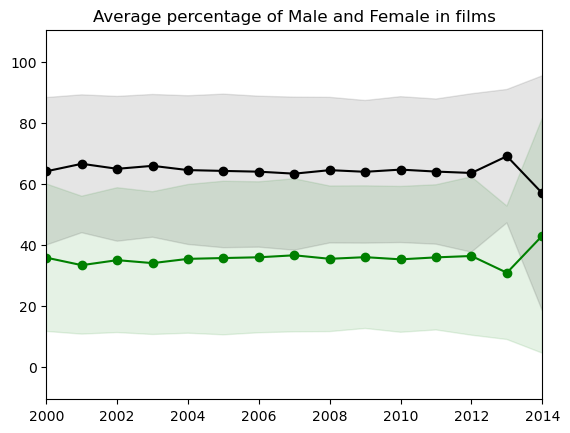

In [197]:
stats_.loc[:, "Release_year"] = pd.to_numeric(stats_.loc[:, "Release_year"])

stats_f = stats_.loc[stats_.loc[:, "variable"]=="F_percentage", :]
stats_m = stats_.loc[stats_.loc[:, "variable"]=="M_percentage", :]

# Plotting for Left-Handed Pitchers
plt.plot(stats_f.loc[:, "Release_year"], stats_f.loc[:, "mean"],
        marker='o', linestyle='-', color='green', label='Left-Handed')
plt.fill_between(
    stats_f.loc[:, "Release_year"].astype(float), 
    stats_f.loc[:, "mean"] - stats_f.loc[:, "std"],
    stats_f.loc[:, "mean"] + stats_f.loc[:, "std"], color='green', alpha=0.1)

plt.errorbar(stats_m.loc[:, "Release_year"], stats_m.loc[:, "mean"],
            marker='o', linestyle='-', color='black', label='Left-Handed')
plt.fill_between(
    stats_m.loc[:, "Release_year"].astype(float), 
    stats_m.loc[:, "mean"] - stats_m.loc[:, "std"],
    stats_m.loc[:, "mean"] + stats_m.loc[:, "std"], color='black', alpha=0.1)

plt.xlim([2000, 2014])

plt.title("Average percentage of Male and Female in films")

In fact, until the 2014, we do not see a sizeable increase in the proportion of female actors in films.

## Compare the mean of the mean proportions of male and female actors

We can treat each year as a sample and study the mean proportions of each year. From LLN, we know that the mean proportions will have a normal distribution, hence a t-test is a suitable statistical test. 

Text(0.5, 1.0, 'Boxplot of mean of mean proportions across years')

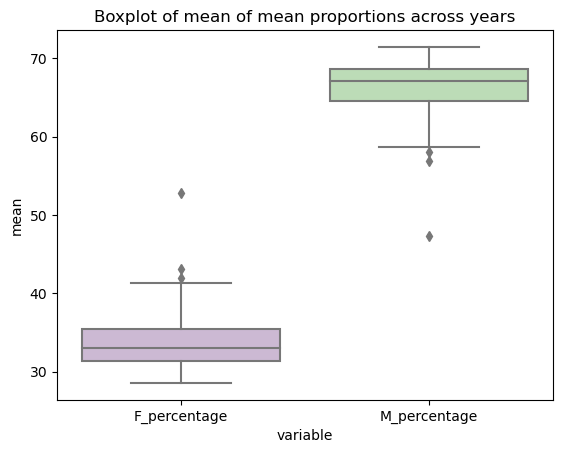

In [202]:
sns.boxplot(x="variable", y="mean", data=stats_, palette="PRGn")
plt.title("Boxplot of mean of mean proportions across years")
# ie. the dots are each year

In [203]:
ttest_ind(
    stats_f.loc[:, "mean"], 
    stats_m.loc[:, "mean"])

TtestResult(statistic=-67.75775688081019, pvalue=1.2535649552504637e-145, df=212.0)

**p-value** We obtain a pvalue of very close to 0. Meaning the difference in mean proportion of female actors and male actors across the years, is statistically significant. The male proportion is significantly higher than that of the female proportions. 

## Seeing if there is a correlation between box office revenue and proportion of female actors

In [225]:
cols_to_use = list(year_df.columns.difference(revenue_df.columns))
revenue_per_year_df = pd.merge(
    revenue_df, 
    year_df.loc[:, cols_to_use + ["Wikipedia movie ID"]], 
    left_on="Wikipedia movie ID", 
    right_on="Wikipedia movie ID")

In [226]:
cols_to_use = list(revenue_per_year_df.columns.difference(pivoted_table.columns))
gender_revenue_per_year_df = pd.merge(
    pivoted_table, 
    revenue_per_year_df.loc[:, cols_to_use + ["Wikipedia movie ID"]],
    left_on="Wikipedia movie ID", 
    right_on="Wikipedia movie ID")

In [229]:
gender_revenue_per_year_df

,Wikipedia movie ID,F,M,total,M_percentage,F_percentage,Freebase movie ID,Release_year,Movie box office revenue
0,3217,3,10,13,76.923077,23.076923,/m/014hr,1992,21502796.0
1,3333,6,8,14,57.142857,42.857143,/m/0151l,1915,50000000.0
2,3746,3,11,14,78.571429,21.428571,/m/017n9,1982,33139618.0
3,3837,2,18,20,90.000000,10.000000,/m/018f8,1974,119500000.0
4,3947,5,10,15,66.666667,33.333333,/m/0191n,1986,8551228.0
...,...,...,...,...,...,...,...,...,...
8142,36354224,1,1,2,50.000000,50.000000,/m/09rz62m,1953,1000000.0
8143,36361189,0,2,2,100.000000,0.000000,/m/0k3jyh6,1951,1025000.0
8144,36745727,2,2,4,50.000000,50.000000,/m/0l8h5rw,2012,8666941.0
8145,36814246,4,2,6,33.333333,66.666667,/m/027jhb,1977,7000000.0
